# Simple SCAM Cases Comparison Plotting Scripts

In [4]:
import matplotlib.pyplot as mp
from matplotlib import gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
import cftime as cft
import nc_time_axis as nct # Provides pretty time axes on plots

import datetime as dt
import metpy.calc as mpy
from metpy.units import units
import metpy.constants as mconst

import xarray as xr
from pylab import *

In [26]:
## Constants ##
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air
grav = mconst.earth_gravity.magnitude       # Gravity ave.
Lv = mconst.water_heat_vaporization.magnitude       # Latent heat of vaporization


## SIMPLE PLOTS ##
pdir = "/Users/rneale/nc_files/"
odir = "/Users/rneale/nc_files/iops/"
fig_dir = "/Users/rneale/Documents/NCAR/PBL/PBL_py_data/png_qlook/"

#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']


fig_pref = 'RICO_test'


#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100b','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101b']
#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.002','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L32','FSCAM.T42_T42.togaII.001.L256']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=3)','CAM6 (#CIN=5)','CAM6 (L32)','CAM6 (L256)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.nolev1zm','FSCAM.T42_T42.togaII.zm.ke002']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L256)','CAM6 (L256-nolev1zm)','CAM6 (tfreez=-10)','FSCAM.T42_T42.togaII.001']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L64','FSCAM.T42_T42.arm97.001','FSCAM.T42_T42.arm97.001.L64']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L64,#CIN=1)','CAM6 (ARM97)','CAM6 (ARM97, L64)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.org00']
#cnames = ['CAM6','CAM6 (zm_org)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.sflux01','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.sflux01','FSCAM.T42_T42.togaII.001.sflux2']
#cnames = ['CAM6','CAM6 (5m ref.)','CAM6 (L256)','CAM6 (L256, 5m ref.)','CAM6 (Zheng scheme)']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.par001']
#cnames = ['CAM6','CAM6-KE.ZM','CAM6-PBLpar']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke002']
#cnames = ['CAM6','CAM6-KE.ZM']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L256','FSCAM.T42_T42.togaII.zm.par001','FSCAM.T42_T42.togaII.zm.par002','FSCAM.T42_T42.togaII.zm.par001.L256','FSCAM.T42_T42.togaII.zm.par002.L256']
#cnames = ['CAM6','CAM6.L256','CAM6-PBLpar.lev','CAM6-PBLpar.prop','CAM6.L256-PBLpar.lev','CAM6.L256-PBLpar.prop']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L256']
#cnames = ['CAM6','CAM6.L256']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L48','FSCAM.T42_T42.togaII.zm.ke000.L76']
#cnames = ['CAM6.L32','CAM6.L48','CAM6.L76 (L110)']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L48','FSCAM.T42_T42.togaII.zm.ke000.L58','FSCAM.T42_T42.togaII.zm.par003','FSCAM.T42_T42.togaII.zm.par003.L48','FSCAM.T42_T42.togaII.zm.par003.L58']
#cnames = ['L32','L48','L58','L32.ZM2','L48.ZM2','L58.ZM2']


#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000.L48','FSCAM.T42_T42.arm97.zm.ke000.L58','FSCAM.T42_T42.arm97.zm.par003','FSCAM.T42_T42.arm97.zm.par003.L48','FSCAM.T42_T42.arm97.zm.par003.L58']
#cnames = ['L32','L48','L58','L32.ZM2','L48.ZM2','L58.ZM2']


#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000.L48','FSCAM.T42_T42.arm97.zm.ke000.L58','FSCAM.T42_T42.arm97.zm.par002','FSCAM.T42_T42.arm97.zm.par002.L48','FSCAM.T42_T42.arm97.zm.par002.L58']
#cnames = ['L32','L48','L58','L32.ZM1','L48.ZM1','L58.ZM1']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000.L48','FSCAM.T42_T42.arm97.zm.ke000.L58','FSCAM.T42_T42.arm97.zm.par003','FSCAM.T42_T42.arm97.zm.par003.L48','FSCAM.T42_T42.arm97.zm.par003.L58']
#cnames = ['L32','L48','L58','L32.ZM2','L48.ZM2','L58.ZM2']


#cases = ['FSCAM.T42_T42.arm97.zm.par002','FSCAM.T42_T42.arm97.zm.par002.L48','FSCAM.T42_T42.arm97.zm.par002.L58']
#cnames = ['L32.ZM1','L48.ZM1','L58.ZM1']
    
#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000.L48','FSCAM.T42_T42.arm97.zm.ke000.L58']
#cnames = ['L32','L48','L58']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000']
#cnames = ['CAM6']

cases = ['FSCAM.T42_T42.RICO.001','FSCAM.T42_T42.RICO.002']
cnames = ['CAM6-nudging','CAM6-no nudging']

#cases = ['FSCAM.T42_T42.PERDIGAO.001','FSCAM.T42_T42.PERDIGAO.002','FSCAM.T42_T42.PERDIGAO.003','FSCAM.T42_T42.PERDIGAO.004']
#cnames = ['CAM6','CAM6-nudged','CAM6-nudged','CAM6-nudged']

# Plots variable
ldiff_plot = False
ovar1d = None ; ovar2d = None # If it does not stay None the plot obs
vscale = 1 ; ovscale1d = 1. ; ovscale2d = 2.


'''
    Variables 
'''

#vderived = ['MSE'] # Derived variables that have to be calculated

#vname = 'RELHUM'   ; vscale = 1. ; units2d='%' ; cmin = 10 ; cmax = 100. ; cmap = 'YlGnBu'
#vname = 'Q'   ; vscale = 1000. ; units2d='g/kg' ; cmin = 0.001 ; cmax = 30. ; cmap = 'YlGnBu' ; ovar2d = 'q' ;ovscale2d = 1000. 
#vname = 'MSE'   ; vscale = 1.e-6 ; units2d='10^6 J/kg' ; cmin = 0.34 ; cmax = 0.4 ; cmap = 'YlGnBu'

#vname = 'T'   ; vscale = 1.  ; units2d='K' ; cmin = 200 ; cmax = 300. ; cmap = 'RdBu_r'
#vname = 'BUOY' ; vscale = 1. ; units2d='K' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'CLOUD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 100. ; cmap = 'Purples'
#vname = 'CONCLD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 50. ; cmap = 'Purples'
#vname = 'CLDICE'   ; vscale = 1000.
#vname = 'CLDLIQ' ; vscale = 1000.
#vname = 'CLDLIQZM' ; vscale = 1000.
#vname = 'DLFZM' ; vscale = 1000.
#vname = 'QRS' ; vscale = 86400.
#vname = 'QRL'   ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'ZMDQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -15 ; cmax = 5. ; cmap = 'RdBu'


#vname = 'ZMDT'   ; vscale = 86400. ; units2d='K/day' ; cmin = -15 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'ZMDLF'   ; vscale = 1000.*86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'STEND_CLUBB'   ; vscale = 86400./cp_air ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

vname = 'RVMTEND_CLUBB'   ; vscale = 86400*1000. ; units2d='g/kg/day' ; cmin = -5. ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'WP2_CLUBB'   ; vscale = 1.; units2d='m2/s2' ; cmin = 0. ; cmax = 0.5 ; cmap = 'Purples'

#vname = 'DCQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -8 ; cmax = 8. ; cmap = 'RdBu_r'
#vname = 'DTCOND' ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'ZMMU' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = -40 ; cmax = 40 ; cmap = 'PuBuGn'
#vname = 'ZMMD' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = -8 ; cmax = 4. ; cmap = 'PuBuGn_r'
#vname = 'WINCLD' ; vscale = 1. ; units2d='m/s' ; cmin = 0; cmax = 20; cmap = 'Purples'
#vname = 'KEPAR'  ; vscale = 1. ; units2d='W/m2' ; cmin = -50; cmax = 200; cmap = 'Purples'

###### 1D fields ######

#vname1d = 'SHFLX' ; vscale1d = 1. ; units1d='W/m^2' ; pmin = 0. ; pmax= 20.
#vname1d = 'LHFLX' ; vscale1d = 1. ;  units1d='W/m^2' ; pmin = 0. ; pmax= 200.
#vname1d = 'U10' ; vscale1d = 1. ;  units1d='m/s' ; pmin = 0. ; pmax= 10.
#vname1d = 'TAUX' ; vscale1d = 1. ;  units1d='kg/m^2/s' ; pmin = -0.2 ; pmax= 0.0
#vname1d = 'ZBOT' ; vscale1d = 1. ;  units1d='m' ; pmin = 0. ; pmax= 150.

#vname1d = 'PRECT' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45. ; ovar1d = 'Prec' ; ovscale1d = 86400. ; ovscale2d = 1000.
vname1d = 'PRECT' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45. ; 

#vname1d = 'PRECZ' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 45.
#vname1d = 'CAPE' ; vscale1d = 1. ;  units1d='J/kg' ; pmin = 0. ; pmax= 1000.
#vname1d = 'LEL' ; vscale1d = 1. ;  units1d='level' ; pmin = 0. ; pmax= 35.
#vname1d = 'KHMAX' ; vscale1d = 1. ;  units1d='level' ; pmin = 850. ; pmax= 1000.
#vname1d = 'PKHMAX' ; vscale1d = 1. ;  units1d='pressure' ; pmin = 800. ; pmax= 1050. # Pressure location of KHMAX

#vname1d = 'CLDLOW' ; vscale1d = 1.

/Users/rneale/nc_files/FSCAM.T42_T42.RICO.001.cam.h0.2004-12-01-00000.nc
Variable on file, read in -> FSCAM.T42_T42.RICO.001
<xarray.DataArray 'RVMTEND_CLUBB' (lev: 9, time: 5600)>
array([[ 9.6269808e-04,  4.8717592e-04,  2.3797785e-03, ...,
         1.4329574e-03,  1.7077180e-03,  1.8507530e-03],
       [ 9.6101756e-04,  4.8469004e-04,  4.1268030e-03, ...,
        -1.4741180e-03, -1.5186534e-03, -1.4719324e-03],
       [ 9.6817996e-04,  5.0345715e-04, -8.0553330e-03, ...,
        -7.1665933e-03, -7.0706764e-03, -7.1554142e-03],
       ...,
       [ 1.2398514e-02,  3.9564073e+00,  9.6773825e+00, ...,
         9.4047362e-01,  1.2307050e+00,  1.6307321e+00],
       [-1.0492857e-02,  6.4911685e+00,  6.6024365e+00, ...,
         2.6561708e+00,  2.5014262e+00,  2.1294188e+00],
       [ 4.5120335e-04,  9.3640919e+00, -1.4029564e+00, ...,
         5.2224679e+00,  4.3992734e+00,  3.0974433e+00]], dtype=float32)
Coordinates:
    lat      float64 18.1
    lon      float64 298.6
  * lev      (lev

/Users/rneale/miniconda3/envs/neale_myenv/lib/python3.7/site-packages/ipykernel_launcher.py:332: UserWarning: FixedFormatter should only be used together with FixedLocator


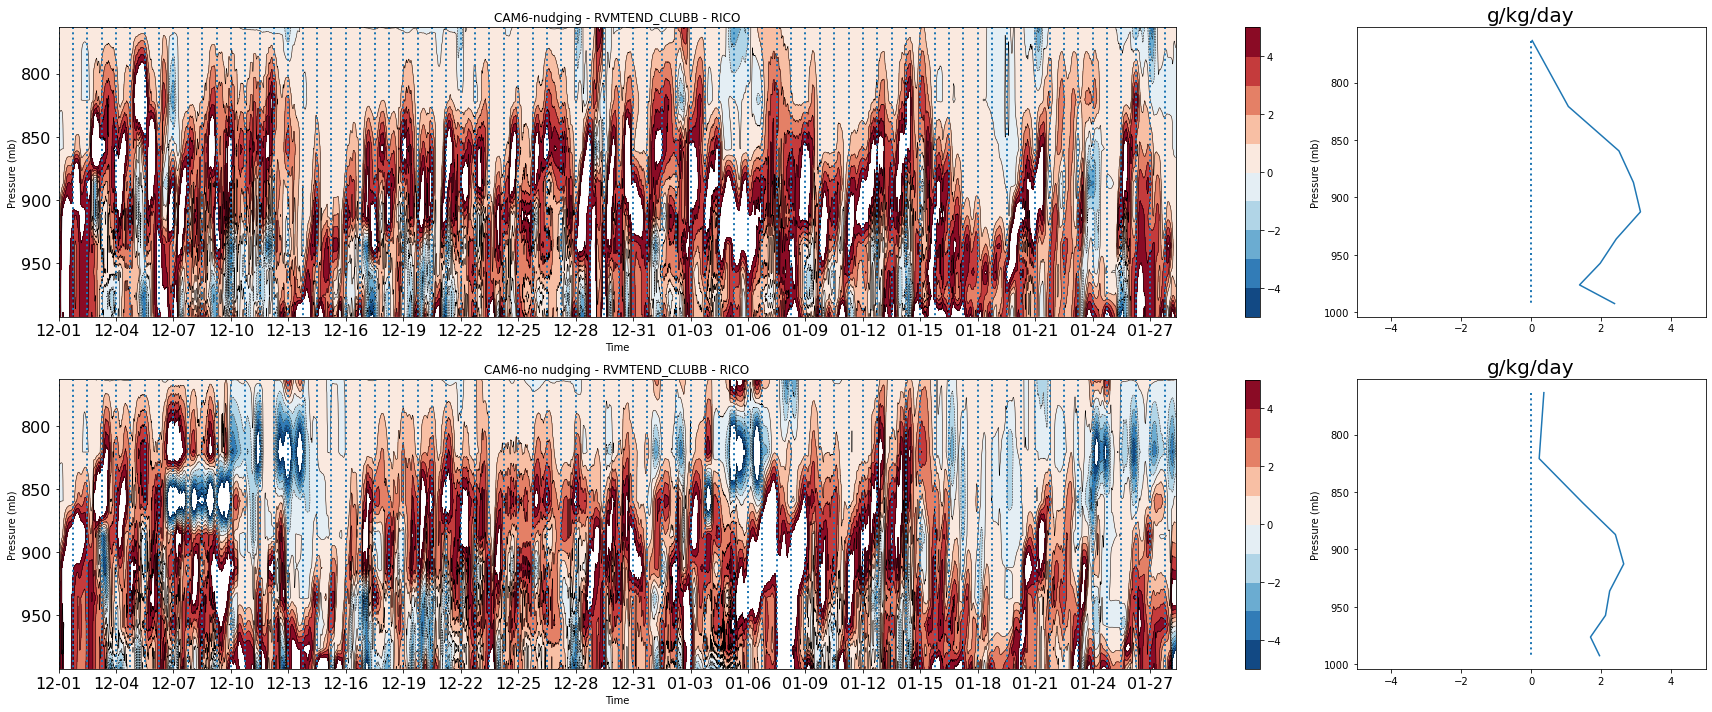

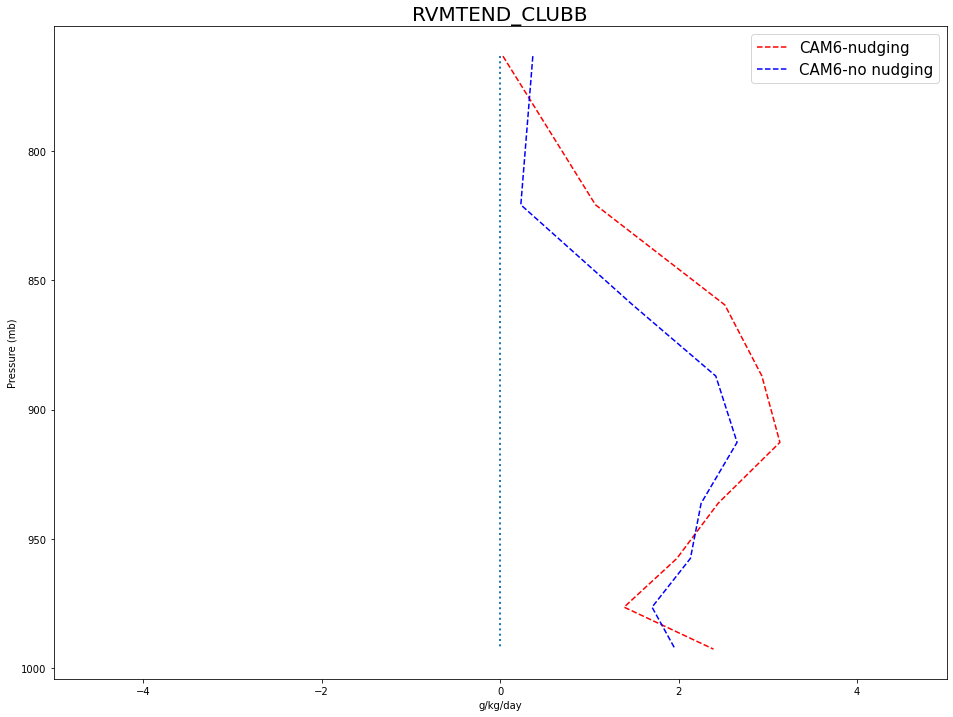

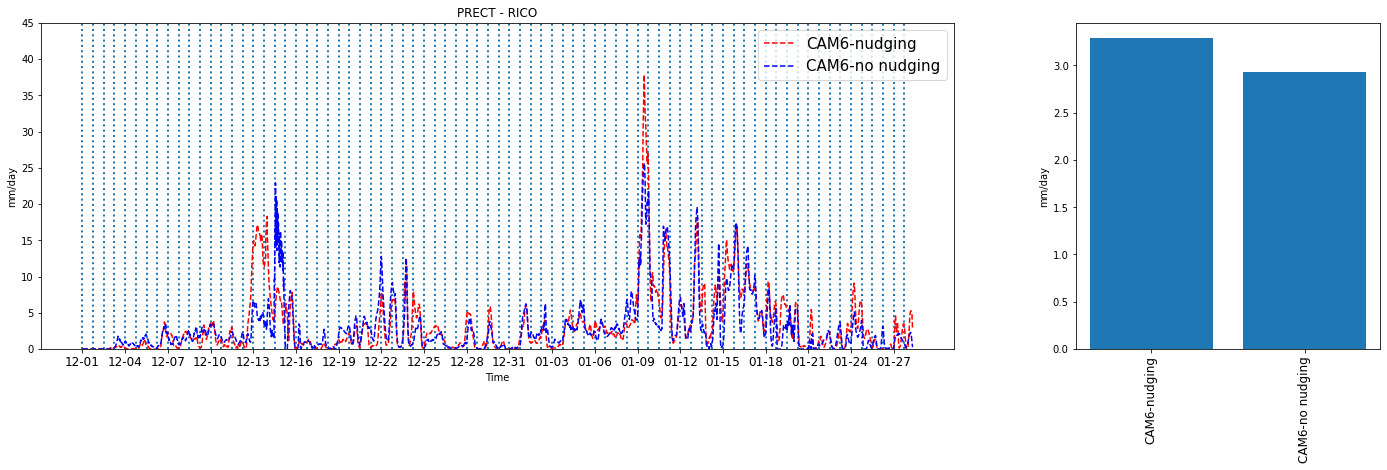

In [27]:
####
rad_var = ['QRL','QRS']

# Identify IOP
if cases[0].find('togaII')!=-1 : csuf =  '.cam.h0.1992-12-18-64800.nc' ; iop = 'TOGAII' 
if cases[0].find('arm97')!=-1 : csuf =  '.cam.h0.1997-06-18-84585.nc' ; iop = 'ARM97'
if cases[0].find('RICO')!=-1 : csuf =  '.cam.h0.2004-12-01-00000.nc' ; iop = 'RICO' 
if cases[0].find('PERDIGAO')!=-1 : csuf =  '.cam.h0.2017-05-01-00000.nc' ; iop = 'RICO' 

lobs1d = False if ovar1d == None else True 
lobs2d = False if ovar2d == None else True 

if lobs1d or lobs2d: 
    obs_in = xr.open_dataset(odir+iop+'_4scam.nc')
    obs_in = obs_in.squeeze()
    if iop=="TOGAII" and ovar1d=='Prec' : ovscale1d = 86400.*1000.
    if lobs1d : var1d_o = ovscale1d*obs_in[ovar1d]
    if lobs2d : var2d_o = ovscale2d*obs_in[ovar2d]        
ncases = len(cases)



## Some plot environments ##

#plt1, ax1 = mp.subplots(ncases,2, figsize=(24,16), gridspec_kw={'width_ratios': [4, 1]})  # tseries plots
plt1, ax1 = mp.subplots(ncases,2, figsize=(24,10), gridspec_kw={'width_ratios': [4, 1]})  # tseries plots

mp.figure(1)
plt1av, ax1av = mp.subplots(1,1,figsize=(16, 12)) # Ave plot of all cases
mp.figure(2)
plt1d, ax1d = mp.subplots(1,2,figsize=(24, 6),gridspec_kw={'width_ratios': [3, 1]}) # 1D timeseries
mp.figure(3)

line_style = ['r--','b--','g--','r','b','g']








'''
    ################################# 
    #######   LOOP CASES    #########  
    #################################  
'''
    
for ic in range(0,len(cnames)):

    
    print(pdir+cases[ic]+csuf)
    scam_in = xr.open_dataset(pdir+cases[ic]+csuf)
    scam_in = scam_in.squeeze()

    if (vname in list(scam_in.keys())): # If a varible doesn't exists just fill with NaNS
    
        print('Variable on file, read in -> '+cases[ic])

        pvar = scam_in[vname]
       
            
    elif [vname in vderived]: # Special variable
        
        print('Derived Variable on file',vname)
        
        if vname=='MSE': # Moist static energy
            pvar = cp_air*scam_in['T'] + Lv*scam_in['Q'] + grav*scam_in['Z3']  
            
    else : # just assign dummy filed from T structure
        pvar = scam_in['T']
        pvar[:,:] = np.nan
           
    if 'ilev' in list(pvar.dims) : pvar = pvar.rename({'ilev':'lev'}) # Sometimes ilev for e.g., CLUBB vars, chnage to lev for convenience

    
    
    pvar = pvar.loc[:,700:]    
    pvar = pvar.transpose()*vscale
    dlev = (cmax-cmin)/10

    if ic == 0: plevels = np.arange(cmin,cmax+dlev,dlev,dtype=np.float)
#    plevels = [0.1,0.3,0.4,0.5,0.75,1,2,3,4,5,8,10,15,20,25,30]

### Time axes lebeling from (annoying) xarray cftime format
    tdate = pvar.time.dt.strftime("%H:%M %m-%d-%Y") # Works for time axis and labeling
    tdate_day = pvar.time.dt.strftime("%m-%d") # Works for time axis and labeling
    
    nsteps_tick_span = 144
    nsteps_per_day = 72
    iticks = np.arange(0, len(tdate)+1, nsteps_tick_span)
    itick_days = np.arange(0, len(tdate)+1, nsteps_per_day)
    
    
    
    
    """ ############################ """
    """ ## Timeseries Height Plot ## """
    """ ############################ """

    mp.figure(1)

    
    if var in rad_var:
        pvar = pvar.where(pvar!=0,drop=True)
        

    print(pvar)
    pvarplot = pvar
    for ipp in range(0,len(pvar.lev)):
        pvarplot[ipp,:] = moving_average(pvar[ipp,:],30) 
        
    
    plt1 = ax1[ic,0].contourf(tdate,pvar.lev,pvar,levels=plevels,cmap=cmap) 
    plt1 = mp.colorbar(plt1,ax=ax1[ic,0])
    ax1[ic,0].contour(tdate,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.5) 
#    ax1[ic,0] = mp.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    ax1[ic,0].set_title(cnames[ic],fontsize=29)
    ax1[ic,0].set_ylabel('Pressure (mb)') 
    ax1[ic,0].set_xlabel("Time")
 
    for label in (ax1[ic,0].get_xticklabels() + ax1[ic,0].get_yticklabels()):
        label.set_fontsize(16)
   

    tick_step =2
    ax1[ic,0].set_xticks(iticks[::tick_step])
    ax1[ic,0].set_xticklabels(tdate_day[iticks[::tick_step]].values)
    ax1[ic,0].invert_yaxis()  
    ax1[ic,0].vlines(tdate[itick_days], min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
    ax1[ic,0].set_title(cnames[ic]+' - '+vname+' - '+iop)
    mp.tight_layout()
    
    
    
    
    
## Average Plot ##
    pvarm = pvar.mean(axis=1)
    
# Gather 1d timeseries variables
    if vname1d != 'PRECT':
       
        if vname1d == 'PKHMAX' :
            pvar1d = vscale1d*scam_in['KHMAX']
            pvar1d_int = pvar1d.values.astype(int)
            for itt,ill in enumerate(pvar1d_int):  pvar1d[itt] = scam_in.lev[ill-1] 

        else :
            pvar1d = vscale1d*scam_in[vname1d]
      
    else :
        pvar1d = vscale1d*(scam_in['PRECC']+scam_in['PRECL'])
    
    if ic == 0 :
        pvarm_all = pvarm 
        lev0 = pvarm.lev
        pvar_all = pvar1d # 1D timseries variables
    else :
        pvarm_int = pvarm.interp(lev=lev0,method="linear")
        pvarm_all = xr.concat((pvarm_all,pvarm_int),dim='case')  
        pvar_all = xr.concat((pvar_all,pvar1d),dim='case')  
        
        
        
        
        
        

        
        
    """ ########################### """
    """ ## Time-ave Height Plot  ## """
    """ ########################### """

    ax1[ic,1].plot(pvarm,pvarm.lev)
    
    
    ax1[ic,1].set_xlim([1.*cmin,1.*cmax])
    
    ax1[ic,1].set_title(units2d,fontsize = 20)
    ax1[ic,1].set_ylabel('Pressure (mb)') 
   
    ax1[ic,1].invert_yaxis()  
    
    ax1[ic,1].vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
    
    if lobs2d : # Add obs. and legend w/ obs if needed.
        ax1[ic,1].plot(var2d_o.mean(axis=0),0.01*var2d_o.lev,'k--')  
        ax1[ic,1].legend(np.append(cnames[ic],iop) if lobs2d else cnames[ic],fontsize=15)
    
    if ic==ncases-1 : 
        mp.figure(1)
        mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_ts_'+vname+'.png', dpi=80,facecolor='white') # If last tseries plot then output.
    
# Average profiles
    mp.figure(2)
    ax1av.plot(pvarm,pvarm.lev,line_style[ic])  
   

# 1D timeseries
    mp.figure(3)
    
    ax1d[0].plot(tdate,moving_average(pvar1d,10),line_style[ic])  

   
    
#    ax1d[0].plot(tdate,moving_average(pvar1d,1),line_style[ic])  
  


'''
################################################### 
############## END MAIN CASE LOOP ################# 
################################################### 
'''








'''
 ########################### 
 ##   Average 2D Plot     ## 
 ########################### 
'''
mp.figure(2)


if lobs2d : ax1av.plot(var2d_o.mean(axis=0),0.01*var2d_o.lev,'k--')     
ax1av.set_ylabel('Pressure (mb)') 
ax1av.set_xlim([1.*cmin,1.*cmax])
ax1av.set_xlabel(units2d) 
#ax1av.set_ylim(ax1.get_ylim()[::-1])
ax1av.set_title(vname,fontsize=20)
ax1av.vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
ax1av.invert_yaxis()  
ax1av.legend(np.append(cnames,iop) if lobs2d else cnames,fontsize=15)
#ax1av.set_xscale('log')
# % age difference plot.
#ax1av[1].plot(100.*pvarm_all[1].transpose()/pvarm_all[0].transpose(),pvarm_all.lev)  

### 2D RATIO OF CASE2/CASE1 ###

#ax1av[1].set_title('100*case2/case1',fontsize=20)
#ax1av[1].set_xlabel('%') 

#ax1av[1].vlines(100., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
#ax1av[1].invert_yaxis()

mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_aves_'+vname+'.png', dpi=100)







""" ########################### """
""" ##   Timseries 1D Plot   ## """
""" ########################### """


# Plot obs
if lobs1d:
    cnames_all = np.append(cnames,iop)
    pvar1d_all = np.vstack([pvar1d_all,[var1d_o.values]])
else:
    cnames_all = cnames
    pvar1d_all = pvar1d



#ax1d[0].plot(tdate,moving_average(pvar_all[0,:].transpose(),10))  

## Still might need to solve the date problem
#odate = pd.to_datetime('19970514.567', format='%Y%m%d')
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 
#odate = [cftime.datetime(year=2017, month=2, day=n) for n in range(1, 31)]
#odate = dt.date(year=obs_in.year, month=obs_in.month, day=obs_in.day
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 

mp.figure(3)



if lobs1d : ax1d[0].plot(tdate,moving_average(var1d_o,10),'k--')  # Line=black with x's [kx]

ax1d[0].legend(cnames_all,fontsize=15)

for label in (ax1d[0].get_xticklabels() + ax1d[1].get_xticklabels()):
        label.set_fontsize(12)

ax1d[0].set_xlabel("Time") 
ax1d[0].set_ylabel(units1d) 
ax1d[0].set_ylim([pmin,pmax])

#ax1d[0].set_xticks(np.arange(0, len(tdate)+1, pntspan))
ax1d[0].set_xticks(iticks[::tick_step])
ax1d[0].set_xticklabels(tdate_day[iticks[::tick_step]].values)

ax1d[0].vlines(tdate[itick_days], pmin,pmax, linestyle="dotted",lw=2)

#ax1d[0].xaxis.set_minor_locator(MultipleLocator(360))
#ax1d[0].xaxis.set_major_locator(MultipleLocator(72))
ax1d[0].set_title(vname1d+' - '+iop)



if vname1d=='LEL':

    lel_range = np.arange(pvar_all.values.min(),pvar_all.values.max()) # Range of lel
    lel_range = lel_range.astype(int)

    ax1d[0].set_yticks(lel_range)
    ax1d[0].set_yticklabels(scam_in.lev[lel_range].values.astype(int))
    
    ax1d[0].invert_yaxis()

if vname1d=='PKHMAX':  ax1d[0].invert_yaxis()

    
""" ########################### """
""" ### Average bar chart ##### """
""" ########################### """

ax1d[1].bar(cnames_all,pvar_all.mean(axis=1))
ax1d[1].set_ylabel(units1d,fontsize=10) 
ax1d[1].set_xticklabels(cnames_all,rotation=90.)

mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_1d_'+vname1d+'.png', dpi=100)



In [25]:
""" ########################### """
""" ###     FUNCTIONS     ##### """
""" ########################### """

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w


    